![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [2]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

#Load Netflix dataset
netflix_df = pd.read_csv("netflix_data.csv")

In [3]:
#Filter 'type' column because we just want to investigate movies
value_to_keep = 'Movie'
netflix_subset = netflix_df.query('type == @value_to_keep')
netflix_subset

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries


In [4]:
#Keep only certain columns 
columns_to_keep = ['title', 'country', 'genre', 'release_year', 'duration']
netflix_movies = netflix_subset[columns_to_keep].copy()
netflix_movies

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95
...,...,...,...,...,...
7781,Zoom,United States,Children,2006,88
7782,Zozo,Sweden,Dramas,2005,99
7783,Zubaan,India,Dramas,2015,111
7784,Zulu Man in Japan,NaN,Documentaries,2019,44


In [5]:
#Filter movies that are shorter than 60 minutes
threshold_value = 60
short_movies = netflix_movies.query('duration < @threshold_value')
short_movies

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
...,...,...,...,...,...
7679,WWII: Report from the Aleutians,United States,Documentaries,1943,45
7692,Ya no estoy aquí: Una conversación entre Guill...,NaN,Documentaries,2020,15
7718,Yoo Byung Jae: Discomfort Zone,South Korea,Stand-Up,2018,54
7771,Zion,United States,Documentaries,2018,12


In [6]:
#Sort the dataframe by the release year to inspect whether movie duration changes over years
short_movies = short_movies.sort_values(by='release_year', ascending=True)
short_movies

,title,country,genre,release_year,duration
4960,Prelude to War,United States,Classic Movies,1942,52
6117,The Battle of Midway,United States,Classic Movies,1942,18
7679,WWII: Report from the Aleutians,United States,Documentaries,1943,45
6657,The Memphis Belle: A Story of a\nFlying Fortress,United States,Classic Movies,1944,40
6699,The Negro Soldier,United States,Classic Movies,1944,40
...,...,...,...,...,...
1207,Captain Underpants Mega Blissmas,United States,Children,2020,46
399,Alien Xmas,United States,Children,2020,42
6670,The Minimalists: Less Is Now,United States,Documentaries,2021,54
1528,Creating The Queen's Gambit,NaN,Documentaries,2021,14


In [7]:
#Sort the dataframe by duration to inspect whether movie duration changes over years
short_movies = short_movies.sort_values(by='duration', ascending=True)
short_movies

,title,country,genre,release_year,duration
5605,Silent,United States,Children,2014,3
5694,Sol Levante,Japan,Action,2020,5
1501,Cops and Robbers,United States,Dramas,2020,8
1203,Canvas,United States,Children,2020,9
463,American Factory: A Conversation with the Obamas,United States,Documentaries,2019,10
...,...,...,...,...,...
181,A Grand Night In: The Story of Aardman,United Kingdom,Documentaries,2015,59
4467,Night on Earth: Shot in the Dark,United Kingdom,Uncategorized,2020,59
1563,D.L. Hughley: Clear,United States,Stand-Up,2014,59
6702,The Netflix Afterparty: The Best Shows of The ...,United States,Comedies,2020,59


Are movies actually getting shorter in recent years? I have no idea :") It seems there's no specific pattern from both sorted dataframes. However, it's pretty challenging to inspect and draw conclusions from hundreds of rows just by a glance at the dataframe. So, let's jump into visualization instead; we might gain more valuable insights from it!


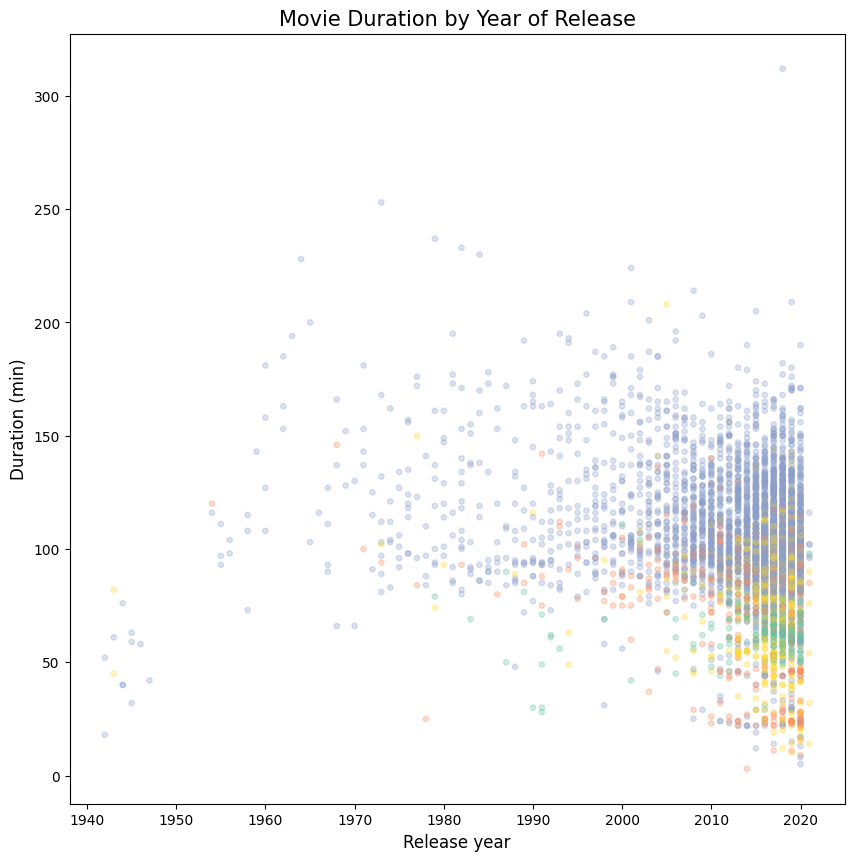

In [8]:
# Define an empty list for colors, and a list for custom color hex codes I want to use
colors = []
palette = ["#fc8d62", "#ffd92f", "#66c2a5", "#8da0cb"]

# Iterate over rows of netflix_movies, and assign colors according to genre groups as a list
for index, row in netflix_movies.iterrows():
    genre = row['genre']
    if genre == 'Children':
        colors.append(palette[0]) #red
    elif genre == 'Documentaries':
        colors.append(palette[1]) #yellow
    elif genre == 'Stand-Up':
        colors.append(palette[2]) #green
    else:
        colors.append(palette[3]) #lilac

# Set the figure style and initalize a new figure
fig = plt.figure(figsize=(10,10))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=colors, alpha=0.3, s=15)

plt.xlabel("Release year", fontsize=12)
plt.ylabel("Duration (min)", fontsize=12)
plt.title("Movie Duration by Year of Release", fontsize=15)
plt.show()

As we see from the scatter plot, there's no strong correlation between the release year and duration, there are a lot of old movies with shorter duration and there are also a lot of recent movies with longer duration

In [9]:
answer = "no"